# Recordad: atajos de teclado
- `Ctrl + Enter`: ejecuta celda seleccionada
- `Mayúsculas + Enter`: ejecuta celda seleccionada y pasa a la siguiente
- `Alt + Enter`: ejecuta celda, inserta nueva y pasa a la siguiente

In [1]:
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Establece estilos por defecto para los gráficos

plt.style.use('ggplot')
# Para ver todos los estilos disponibles:
# print(plt.style.available)

plt.rcParams['figure.figsize'] = [15, 5]

## Color/estilo de línea

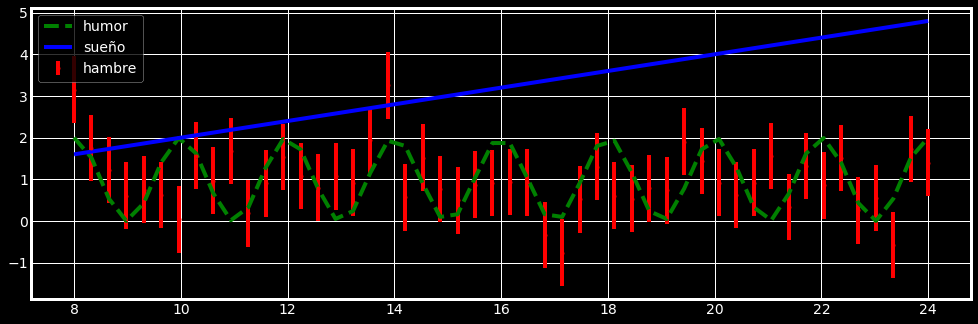

In [10]:
_rcParams = plt.rcParams.copy()

plt.style.use('dark_background')
# plt.style.available

N = 50
np.random.seed(4873)

x = np.linspace(8, 24, N)
k = 0.8
y = k + np.sin(x) * np.random.randn(N)

(fig, ax) = plt.subplots(1)
ax.errorbar(x, y, yerr=k, fmt='.r', label='hambre');
ax.plot(x, 1 + np.cos(np.pi*x), '--g', label='humor')
ax.plot(x, x/5, 'b', label='sueño')
plt.legend();


## xticks/yticks

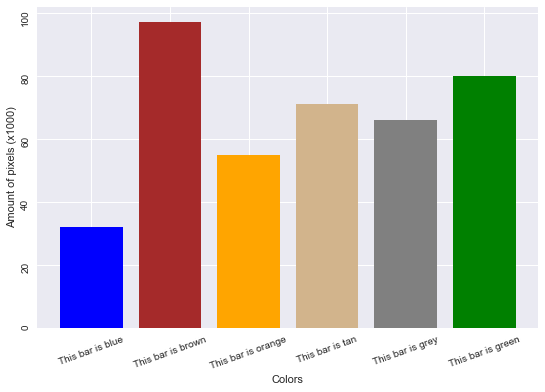

In [11]:
plt.style.use('seaborn')
# Obtención de datos
np.random.seed(333)  # reproducibilidad
colors = ['blue', 'brown', 'orange', 'tan', 'grey', 'green']
N = len(colors)
values = np.random.randint(20, 100, N)
ind = [f'This bar is {color}' for color in colors]

# Creamos figura y ejes
fig, ax = plt.subplots()  # 1 fila, 1 columna (por defecto)

ax.bar(ind,     # eje 'x'
       values,  # eje 'y'
       color=colors)
ax.set_ylabel('Amount of pixels (x1000)')
ax.set_xlabel('Colors')

#####
plt.yticks(rotation='vertical')  # rotados verticalmente
plt.xticks(rotation=20);         # rotados 20 grados (sentido antihorario)
#####

## Títulos, etiquetas y anotaciones (`suptitle`, `title`, `xlabel/ylabel`, `annotations`)

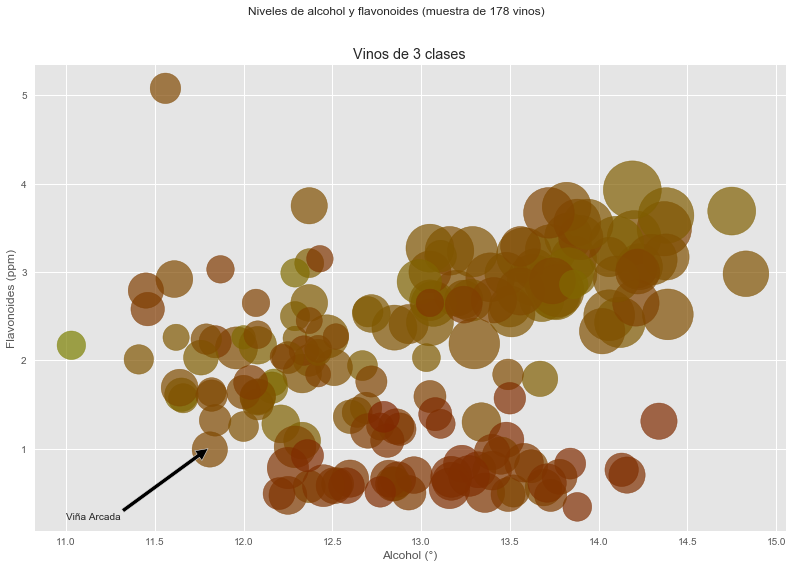

In [12]:
from matplotlib import colors
from sklearn.datasets import load_wine

# Estilo
plt.style.use('ggplot')

# Obtención de datos
wine = load_wine()
vino = [wine.feature_names.index(param) for param in ['alcohol', 'flavanoids', 'hue', 'color_intensity']]
colores = np.stack(( wine.data[:, vino[2]]/10, len(wine.data)*[.99], len(wine.data)*[.5] ))  # hsv
tamaño = wine.data[:, -1]*2

# Creamos figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(wine.data[:,vino[0]],
           wine.data[:,vino[1]],
#            c=wine.target,
           color=list(map(colors.hsv_to_rgb, colores.T)),
           alpha=.7,
           s=tamaño)

#####
# Título de la figura
fig.suptitle('Niveles de alcohol y flavonoides (muestra de 178 vinos)')

# Título del gráfico (subplot)
ax.set_title('Vinos de 3 clases')

# Etiqueta del eje 'x'
ax.set_xlabel('Alcohol (°)')

# Etiqueta del eje 'x'
ax.set_ylabel('Flavonoides (ppm)')

# Anotación de texto
ax.annotate('Viña Arcada', xy=(11.8, 1), xytext=(11, .2),
            arrowprops=dict(facecolor='black'));
#####

## Leyendas (`legend`)

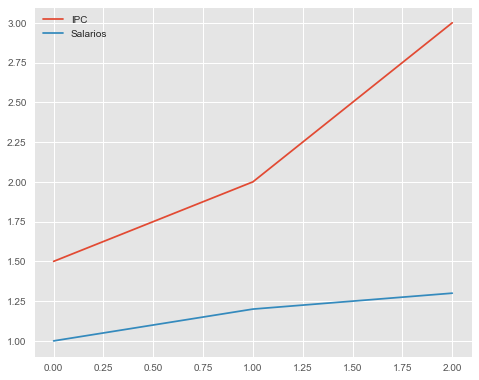

In [13]:
# Creamos figura y ejes
fig, ax = plt.subplots(figsize=(7, 6))

(line1,) = ax.plot([1.5, 2, 3])
(line2,) = ax.plot([1, 1.2, 1.3], label='Salarios')

#####
# ax.legend(loc='lower right') # solo datos etiquetadoss

ax.legend([line1, line2],              # filrar de qué líneas haremos la leyenda
          ['IPC', line2.get_label()],  # etiquetas, opcional si las líneas fueron etiquetadas
          loc='upper left');           # posición
#####

## Más estilos...

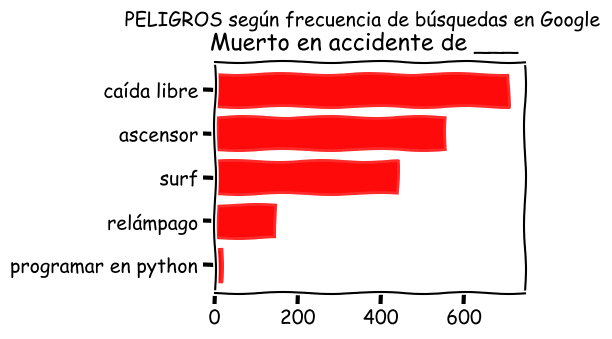

In [14]:
data = {'caída libre': 710, 'ascensor': 560, 'surf': 444, 'relámpago': 150, 'programar en python': 20}
names = list(data.keys())
values = list(data.values())

names.reverse()
values.reverse()

#####
plt.style.use('default')
with plt.xkcd():
#####    
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(111)
    ax.barh(names, values, alpha=0.8, color='red')
    fig.suptitle('Muerto en accidente de ___')
    fig.text(-.1, 1, "PELIGROS según frecuencia de búsquedas en Google");


# Tipos de gráficos con `matplotlib`/`pyplot`

## lineplot

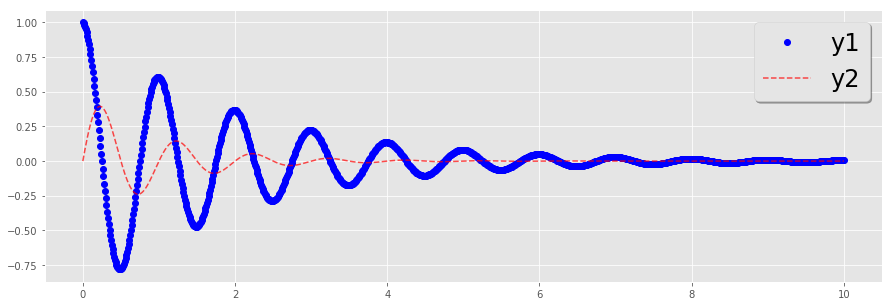

In [4]:
# Obtención de datos
x = np.linspace(0, 10, 1000)
y1 = np.exp(-x / 2) * np.cos(2 * np.pi * x)
y2 = 0.5 * np.exp(-x) * np.sin(2 * np.pi * x)

# Creamos figura y ejes
(fig, ax) = plt.subplots(1, 1)  # (n_rows, n_cols)

#####
ax.plot(x, y1,  # datos (x, y)
        'bo',   # azul con puntos redondos (blue, 'o')
        label='y1')  # nombramos para crear la leyenda

ax.plot(x, y2,
        'r--',      # rojo con línea discontínua '--'
        alpha=0.7,  # transparente al 70%
        label='y2')


# equivalente a:
# ax.plot(x, y1, 'bo', x, y2, 'r--')
#####


ax.legend(loc='best',    # creamos leyenda en el hueco más libre
          shadow=True,   # sombreado
          fontsize=24);  # tamaño de fuente


## Gráfico de dispersión (`scatter`)

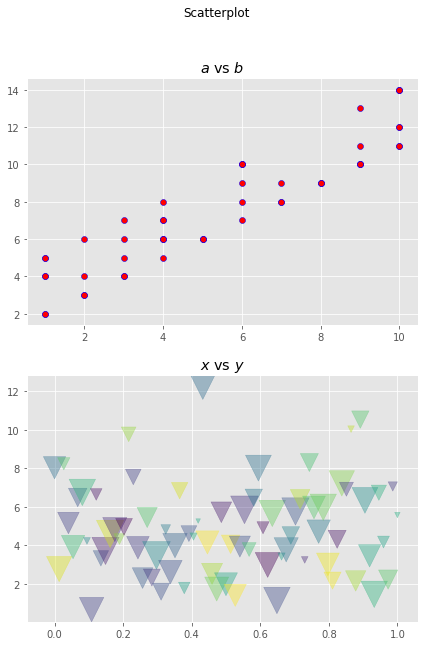

In [5]:
# Obtención de datos
N = 75
np.random.seed(45987230)  # reproducibilidad

a = np.random.randint(low=1, high=11, size=50)
b = a + np.random.randint(1, 5, size=a.size)
x = np.linspace(0, 1, N)
y = np.random.gamma(5, size=N)
colors = np.random.rand(N)


# Creamos figura y ejes
fig, (ax1, ax2) = plt.subplots(2, 1,  # 2 filas por 1 columna
                               figsize=(7, 10))  # tamaño

#####
ax1.scatter(  # dibujamos sobre el eje 'ax1'
    x=a,
    y=b,
    marker='o',  # marcas con puntos redondos
    c='r',  # color rojo
    edgecolor='b'  # borde de color azul
)
#####

# Poner título sobre el gráfico
ax1.set_title('$a$ vs $b$')

#####
ax2.scatter(  # dibujamos sobre el eje 'ax2'
    x, y,  # equivalente a x=x, y=y
    s=np.random.randint(10,800, N),  # tamaño
    marker='v',  # tipo de marcador
    c=colors,  # colores
    alpha=0.4  # nivel de transparencia 40%
)
#####

# Título sobre el gráfico
ax2.set_title('$x$ vs $y$')

# Título general a toda la figura
fig.suptitle("Scatterplot");

## Gráfico de barras (`bar`)

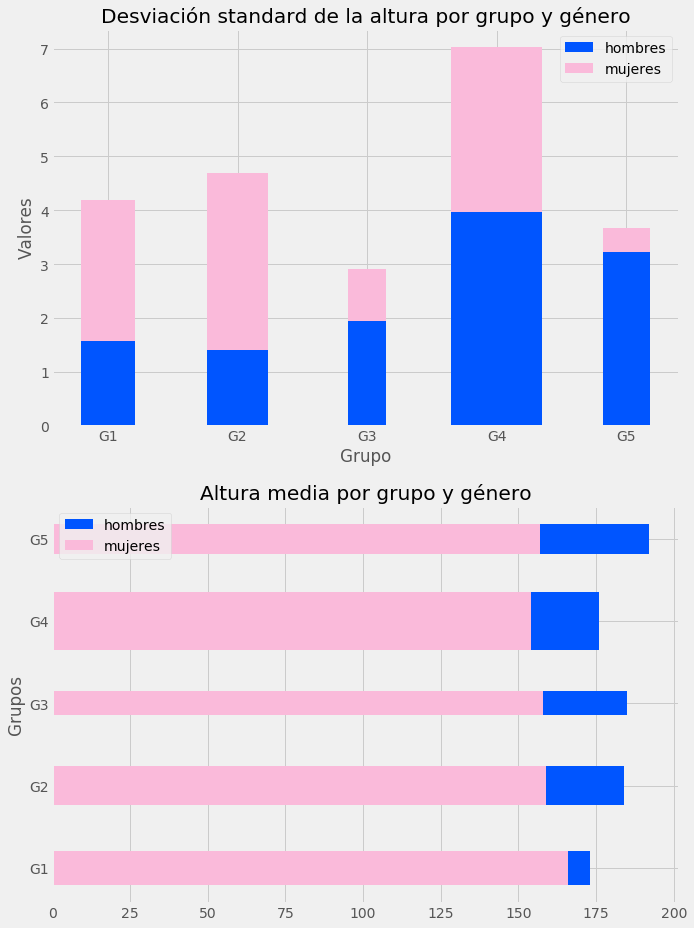

In [6]:
# Cambiamos el estilo (colores del gráfico)
plt.style.use('fivethirtyeight')

# Obtención de datos
N = 5
np.random.seed(N)
men_means = np.random.randint(170, 195, N)
women_means = np.random.randint(150, 180, N)

men_std = np.random.uniform(0, 4, N)
women_std = np.random.uniform(0, 4, N)

ind = ['G1', 'G2', 'G3', 'G4', 'G5']
width = (men_std + women_std)/2/N

# Creamos figura y ejes
fig, (ax1, ax2) = plt.subplots(2, # 2 filas
                               figsize=(10, 15))

#####
ax1.bar(
    ind,             # eje de abcisas ('x')
    men_std,         # eje de ordenadas ('y')
    width,           # grosor de barra
    color='#0055ff'  # color de barra (RGB)
)
ax1.bar(  # dibujamos de nuevo sobre el gráfico anterior
    ind,
    women_std,
    width,
    color='#fabada',
    bottom=men_std  # sobre las barras anteriores (apilado)
)
#####



ax1.set_ylabel('Valores')  # etiqueta en el eje 'y'
ax1.set_xlabel('Grupo')  # etiqueta en el eje 'x'
ax1.set_title('Desviación standard de la altura por grupo y género')  # título del gráfico
ax1.legend(['hombres', 'mujeres'], loc='best')  # leyenda




######
# barh: Barras Horizontales
ax2.barh(
    ind,            # eje de ordenadas 'y' (barras horizontales!)
    men_means,      # eje de abcisas 'x'
    width,          # grosor de barra
    color='#0055ff' # color (RGB)
)
ax2.barh(
    ind,            # eje de ordenadas 'y' (barras horizontales!)
    women_means,    # eje de abcisas 'x'
    width,          # grosor de barra
    color='#fabada' # color (RGB)
)
######


ax2.legend(['hombres', 'mujeres'], loc='upper left')  # leyenda
ax2.set_title('Altura media por grupo y género')  # título del gráfico
ax2.set_ylabel('Grupos');  # título del eje 'y'

## Histograma (`hist`)

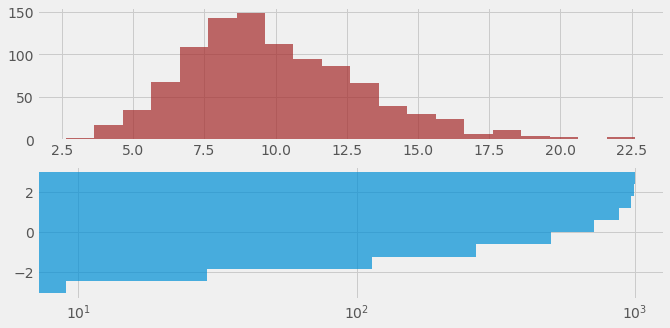

In [7]:
# Obtención de datos
bins = 20
x1 = np.random.gamma(10, size=1000)
x2 = np.random.randn(1000)

# Creamos figura y ejes
fig, (ax1, ax2) = plt.subplots(
    2,  # 2 filas 1 columna
    figsize=(10, 5)
)


# hist() devuelve (valores, bins, columnas individuales)
# _ para almacenar datos "basura"

#####
(ax1_values, _, _) = ax1.hist(
    x1,                # valores a representar
    bins=bins,         # número de divisiones
    facecolor='brown', # color
    alpha=.7           # transparente al 70%
);
(_, ax2_bins, _) = ax2.hist(
    x2,                       # valores a representar
    alpha=.7,                 # transparente al 70%
    cumulative=True,          # acumulativo
    log=True,                 # eje en escala logarítmica (log10)
    orientation='horizontal'  # orientación
);
#####

## Diagrama circular (`pie`)

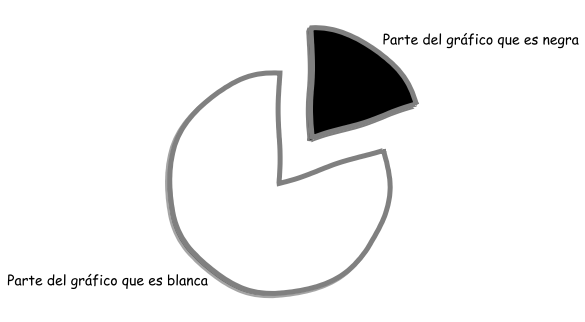

In [9]:
# Obtención de datos
sizes = [80, 20]
colors = {'white': 'blanca', 'black': 'negra'}
labels = [f'Parte del gráfico que es {colors[c]}' for c in colors]
colors = colors.keys()
explode = (0, .5)
    
with plt.xkcd():  # cambiamos temporalmente el estilo
    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(5,5))

    #####
    (wedges, text) = ax.pie(
        sizes,                # datos a representar
        explode=explode,      # espacio de separación entre segmentos
        labels=labels,        # etiquetas
        colors=colors,        # colores
        shadow=True,          # sombreo
        startangle=90,        # rotación
        wedgeprops={'edgecolor': 'grey', 'linewidth': 5}  # parámetros del dibujo
    )
    #####
    
    # ejes iguales (asegurarnos de que se muestre como un círculo)
    ax.axis('equal');

Tipos de fichero soportados:


{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics'}

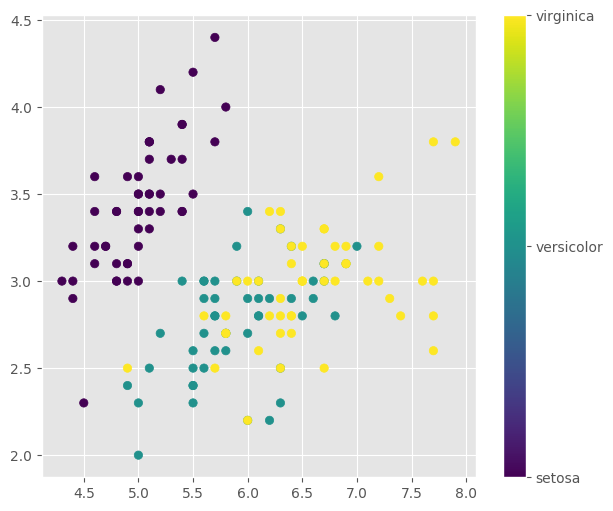

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 6))
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#####
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)

# figure.savefig('iris.png')
print('Tipos de fichero soportados:')
fig.canvas.get_supported_filetypes()
#####

# Mapas de colores en `matplotlib`

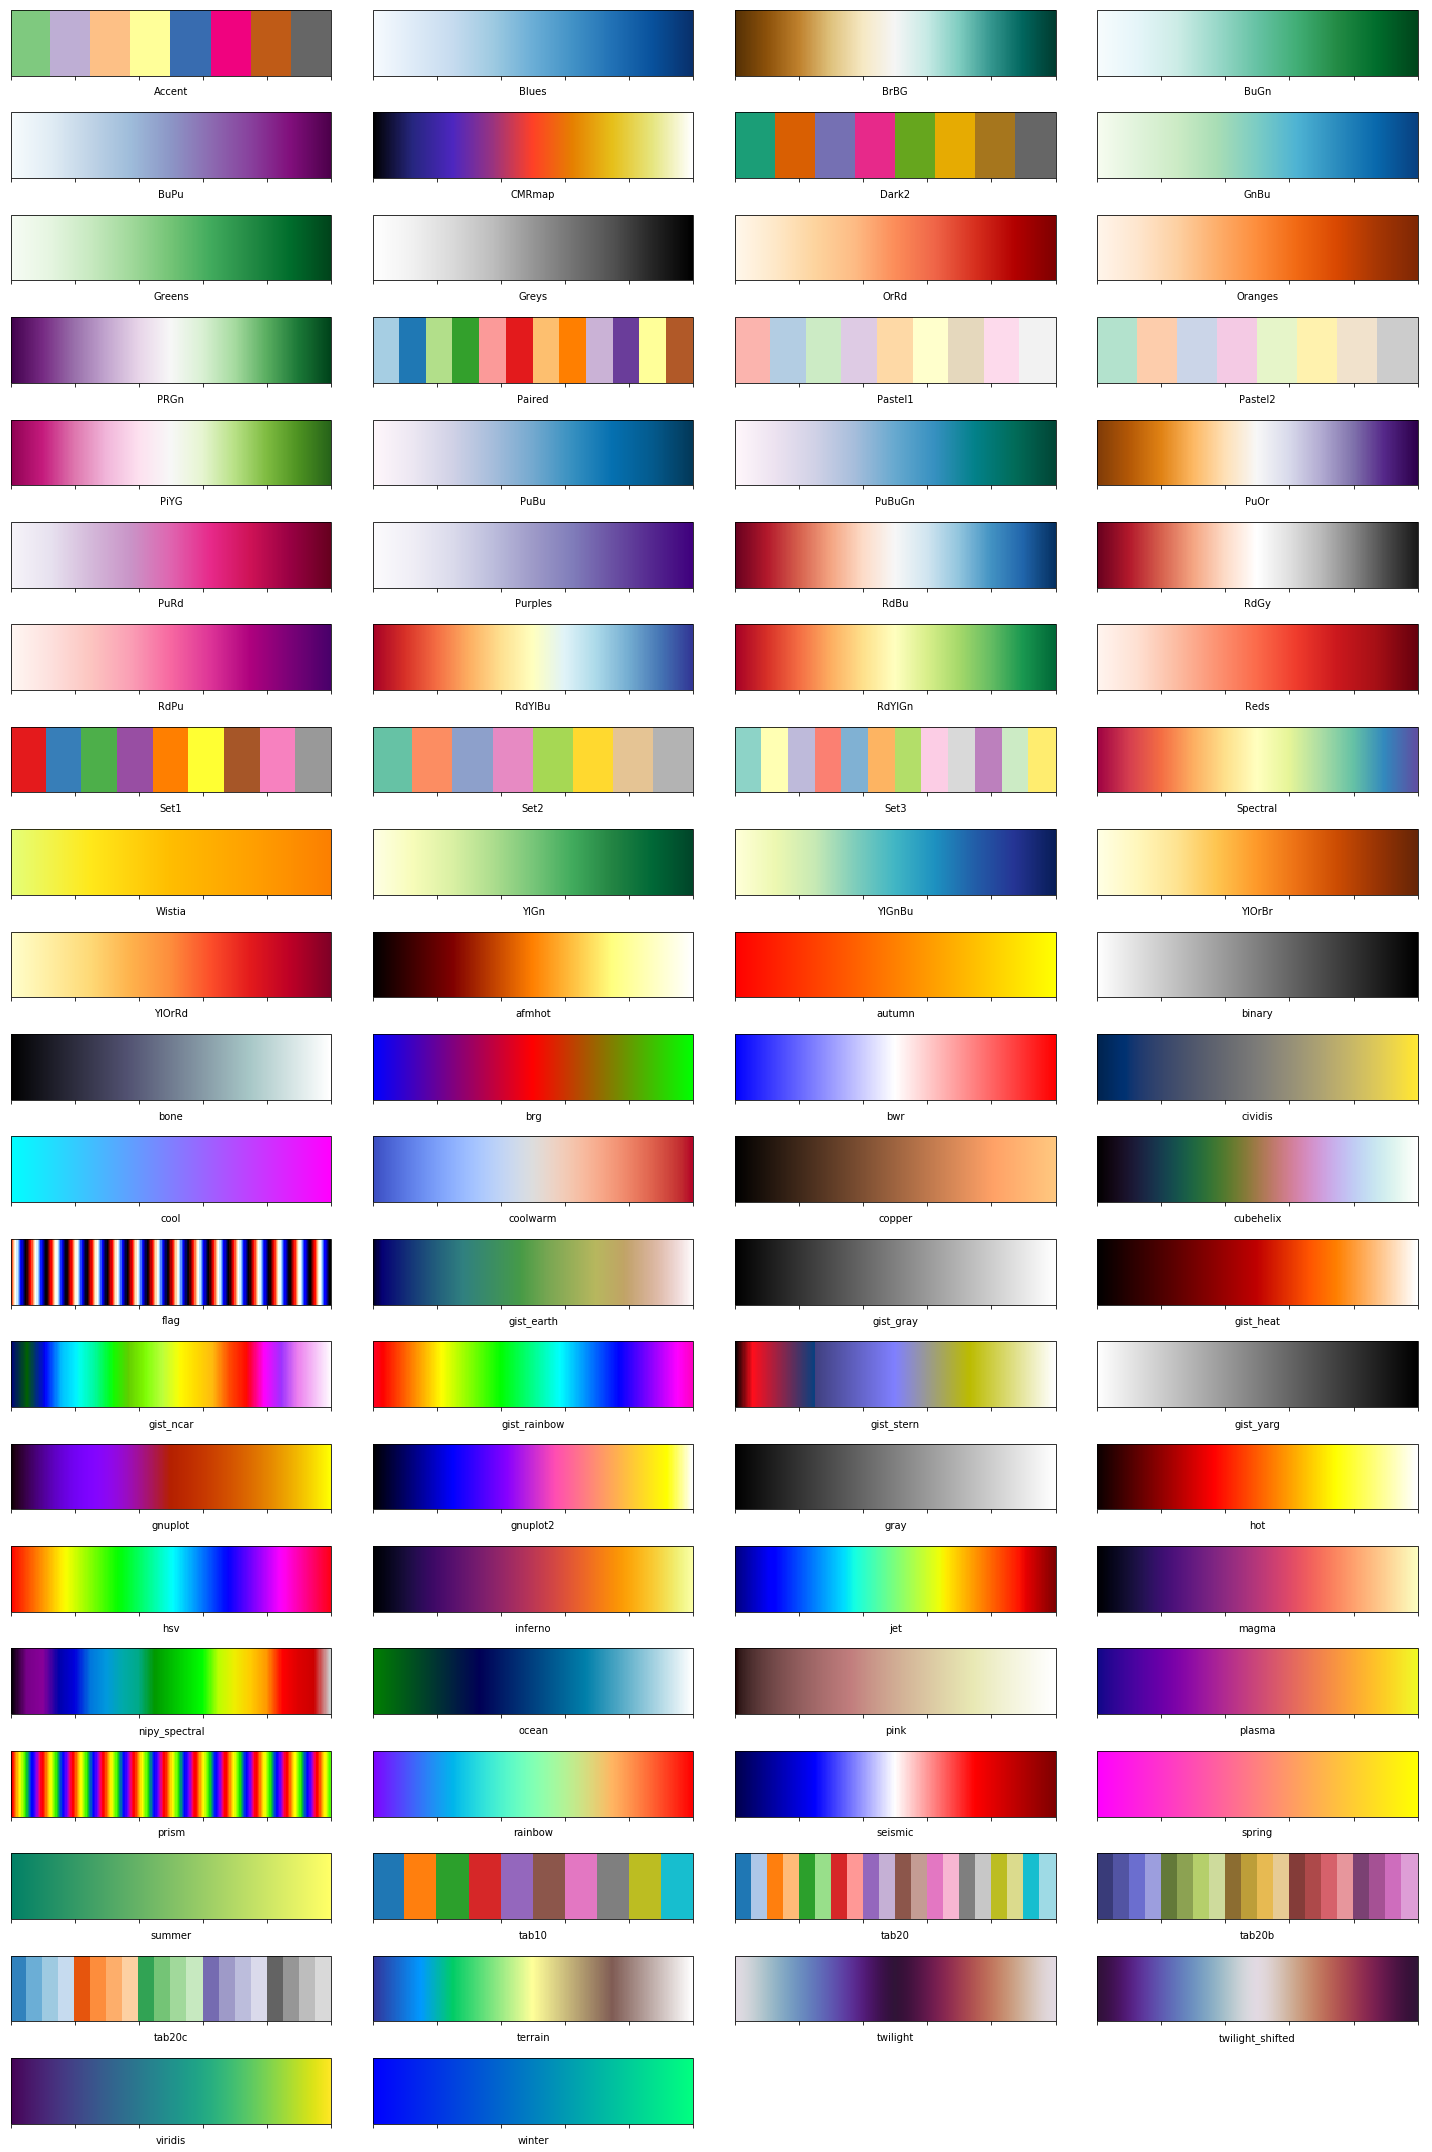

In [5]:
cmaps = [c for c in plt.colormaps() if not c.endswith('_r')]
fig, axes = plt.subplots(len(cmaps)//4 + 1, 4, figsize=(20, 30))

sobran = axes.size - len(cmaps)
for sobra in range(sobran):
    axes[-1, -(sobra + 1)].axis('off')  # no dibujar los últimos
axes = axes.flatten()[:-sobran]         # eliminar los últimos de la lista

for ax, cm in zip(axes.ravel(), cmaps):
    cmap = plt.cm.get_cmap(cm)
    cb = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap, 
                                   orientation='horizontal')
    cb.set_label(cm)
    ax.xaxis.set_ticklabels([])

plt.tight_layout()

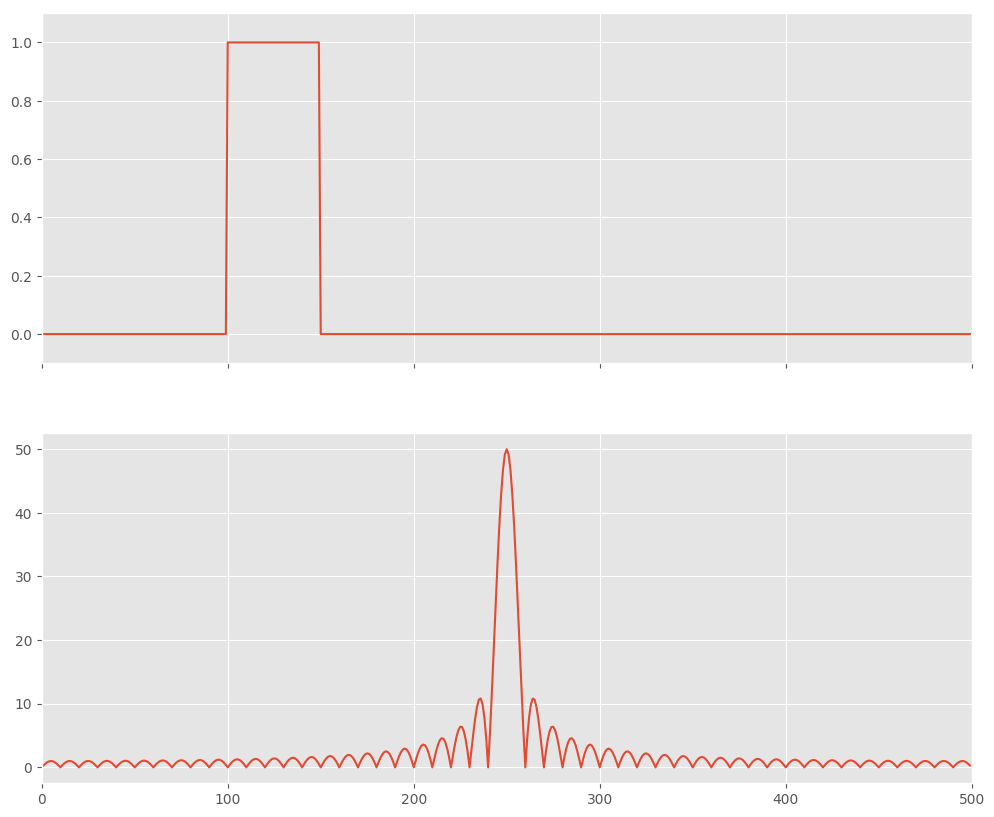

In [16]:
x = np.zeros(500)
x[100:150] = 1
f = np.fft.fft(x)

#####
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(12,10))
ax0.plot(x)
ax0.set_ylim(-0.1, 1.1)
ax0.set_xlim(0, 500)
ax1.plot(np.fft.fftshift(np.abs(f)));
#####